**Asignatura:** Procesamiento de Datos

**Carrera:** Tecnicatura Superior en Ciencias de  Datos e Inteligencia Artificial

**Grupo 1:**
- Carabajal, Elba Julieta
- Bucci, Carlos Matias
- Schiavon, Leandro Nicolás
- Segovia Albarado, Nicolás Daniel



## Sobre tratamiento de datos nulos
- Categóricas → `'Desconocido'` cuando faltan valores (MCAR)
- Numéricas → **mediana** (global) salvo que se pueda imputar por grupo (ej.: provincia)
- Reemplazos puntuales con **0** o **moda** cuando corresponda.

In [1]:
# Instalar librerías necesarias (Colab)
!pip install python-pptx --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
#from pptx import Presentation
#from pptx.util import Inches
#plt.rcParams['figure.figsize'] = (10,6)
#pd.set_option('display.max_columns', 80)
#pd.set_option('display.max_colwidth', 200)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 12.6 MB/s eta 0:00:00


In [2]:
#-----------------------------------------------
#    Cargar dataset (desde un CSV público)
#-----------------------------------------------

path = "/content/base_da_2_con_faltantes.csv"

df = pd.read_csv(path, sep=None, engine='python')


In [3]:
#--------------------------------------------------------------------
#       Visualización de estructura y tipos de datos
#--------------------------------------------------------------------
print('\n------> Dimensiones del dataset:  ', df.shape)
print('\n\n------> Información del dataset:  ')
display(df.info())
print('\n\n------> Descripción del dataset <------\n  ')
print('\n--- Describe (numéricas) ---')
display(df.describe(include=[np.number]).T)
print('\n--- Describe (objetos) ---')
display(df.describe(include=['object']).T)


# Se leen los 5 primeros datos
print('\n\n------> Información completa de las 5 primeras filas del dataset:\n\n')

display(df.head())



------> Dimensiones del dataset:   (8519, 9)


------> Información del dataset:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_provincia          8519 non-null   int64  
 1   provincia              8519 non-null   object 
 2   cod_ncm_6d             8519 non-null   int64  
 3   ncm_6d                 8519 non-null   object 
 4   seccion                8519 non-null   object 
 5   tiene_vcr              8519 non-null   int64  
 6   centralidad            8223 non-null   float64
 7   complejidad_producto   8135 non-null   float64
 8   complejidad_provincia  6162 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 599.1+ KB


None



------> Descripción del dataset <------
  

--- Describe (numéricas) ---


,count,mean,std,min,25%,50%,75%,max
cod_provincia,8519.0,32.958094,31.373325,2.00000,6.00000,14.000000,66.000000,94.000000
cod_ncm_6d,8519.0,517531.974528,292709.047538,10121.00000,280440.00000,510529.000000,841280.000000,999805.000000
tiene_vcr,8519.0,0.186876,0.389835,0.00000,0.00000,0.000000,0.000000,1.000000
centralidad,8223.0,0.168148,0.039433,0.01720,0.14350,0.174200,0.197950,0.252200
complejidad_producto,8135.0,-0.089494,0.968992,-3.75520,-0.78815,0.041600,0.645550,2.626900
complejidad_provincia,6162.0,-0.349400,0.316403,-1.33322,-0.36189,-0.334866,-0.165786,0.087869



--- Describe (objetos) ---


,count,unique,top,freq
provincia,8519,24,Buenos Aires,2801
ncm_6d,8519,3171,Muestras,22
seccion,8519,10,"Agro, Alimentos y Bebidas",2529




------> Información completa de las 5 primeras filas del dataset:




,cod_provincia,provincia,cod_ncm_6d,ncm_6d,seccion,tiene_vcr,centralidad,complejidad_producto,complejidad_provincia
0,2,Ciudad Autónoma de Buenos Aires,10129,"Caballos, exc. reproductores de raza pura","Agro, Alimentos y Bebidas",0,0.1663,0.0937,0.087869
1,2,Ciudad Autónoma de Buenos Aires,10619,Animales mamíferos ncop.,"Agro, Alimentos y Bebidas",0,0.1621,-0.0684,0.087869
2,2,Ciudad Autónoma de Buenos Aires,20621,Lenguas bovinas congeladas,"Agro, Alimentos y Bebidas",0,0.0943,-0.8430,0.087869
3,2,Ciudad Autónoma de Buenos Aires,20622,Hígados bovinos congelados,"Agro, Alimentos y Bebidas",0,0.1358,NaN,0.087869
4,2,Ciudad Autónoma de Buenos Aires,20629,"Despojos de bovinos, comestibles, congelados","Agro, Alimentos y Bebidas",0,0.1186,-1.1601,0.087869


In [4]:
#-------------------------------------------
#     Detección de valores nulos
#-------------------------------------------

# Conteo y porcentaje de nulos por columna
nulos = df.isnull().sum().sort_values(ascending=False)
porc_nulos = (df.isnull().mean() * 100).round(2).sort_values(ascending=False)
display(pd.concat([nulos, porc_nulos], axis=1, keys=['nulos','%_nulos']).head(60))

,nulos,%_nulos
complejidad_provincia,2357,27.67
complejidad_producto,384,4.51
centralidad,296,3.47
cod_provincia,0,0.00
provincia,0,0.00
seccion,0,0.00
ncm_6d,0,0.00
cod_ncm_6d,0,0.00
tiene_vcr,0,0.00


In [5]:
#--------------------------------------------------
#       Limpieza y tratamiento de datos Nulos
#--------------------------------------------------
# Creamos copia para preservar original
df_clean = df.copy()

# Definimos numéricas y de categorías
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_clean.select_dtypes(include=['object','category']).columns.tolist()


# 1) Categóricas: sustituir nulos por 'Desconocido'
cat_con_nulos = [c for c in cat_cols if df_clean[c].isnull().sum()>0]
print('\n--> Columnas categóricas con nulos: ', cat_con_nulos)
for c in cat_con_nulos:
    df_clean[c] = df_clean[c].fillna('Desconocido')

# 2) Numéricas: sustituir por mediana global
num_con_nulos = [c for c in numeric_cols if df_clean[c].isnull().sum()>0]
print('\n--> Columnas numéricas con nulos:', num_con_nulos)
for c in num_con_nulos:
    med = df_clean[c].median()
    df_clean[c] = df_clean[c].fillna(med)

# 3) Ejemplo: si existe columna con 'prov' en su nombre, usar mediana por provincia para imputar una numérica (si aplica)
prov_candidates = [c for c in df_clean.columns if 'prov' in c.lower() or 'provincia' in c.lower()]
if prov_candidates and num_con_nulos:
    prov_col = prov_candidates[0]
    target_num = num_con_nulos[0]
    print(f'\n--> Imputando {target_num} por mediana según {prov_col} (si hay nulos)')
    df_clean[target_num] = df_clean.groupby(prov_col)[target_num].transform(lambda x: x.fillna(x.median()))

# 4) Reemplazo por moda/0 como ejemplos para columnas seleccionadas
if cat_cols:
    example_cat = cat_cols[0]
    moda = df_clean[example_cat].mode()[0]
    df_clean[example_cat] = df_clean[example_cat].fillna(moda)
    print(f'Reemplazado ejemplo categórica {example_cat} nulos por moda: {moda}')
if numeric_cols:
    example_num = numeric_cols[0]
    df_clean[example_num] = df_clean[example_num].fillna(0)
    print(f'Reemplazado ejemplo numérica {example_num} nulos por 0')

print('\n\n--> Nulos restantes por columna (después):')
display(df_clean.isnull().sum().sort_values(ascending=False).head(60))


--> Columnas categóricas con nulos:  []

--> Columnas numéricas con nulos: ['centralidad', 'complejidad_producto', 'complejidad_provincia']

--> Imputando centralidad por mediana según cod_provincia (si hay nulos)
Reemplazado ejemplo categórica provincia nulos por moda: Buenos Aires
Reemplazado ejemplo numérica cod_provincia nulos por 0


--> Nulos restantes por columna (después):


,0
cod_provincia,0
provincia,0
cod_ncm_6d,0
ncm_6d,0
seccion,0
tiene_vcr,0
centralidad,0
complejidad_producto,0
complejidad_provincia,0


In [ ]:
# Conteo y porcentaje de nulos en clean
# Conteo y porcentaje de nulos por columna
nulos = df_clean.isnull().sum().sort_values(ascending=False)
porc_nulos = (df_clean.isnull().mean() * 100).round(2).sort_values(ascending=False)
display(pd.concat([nulos, porc_nulos], axis=1, keys=['nulos','%_nulos']).head(60))


,nulos,%_nulos
cod_provincia,0,0.0
provincia,0,0.0
cod_ncm_6d,0,0.0
ncm_6d,0,0.0
seccion,0,0.0
tiene_vcr,0,0.0
centralidad,0,0.0
complejidad_producto,0,0.0
complejidad_provincia,0,0.0


Visualizaciones iniciales

Generamos histogramas para variables numéricas, barras para categóricas y un scatter entre dos numéricas si existen.

Número de columnas numéricas: 6
Número de columnas categóricas: 3


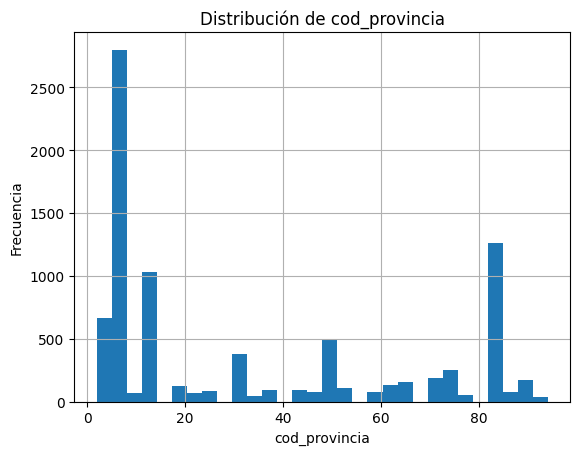

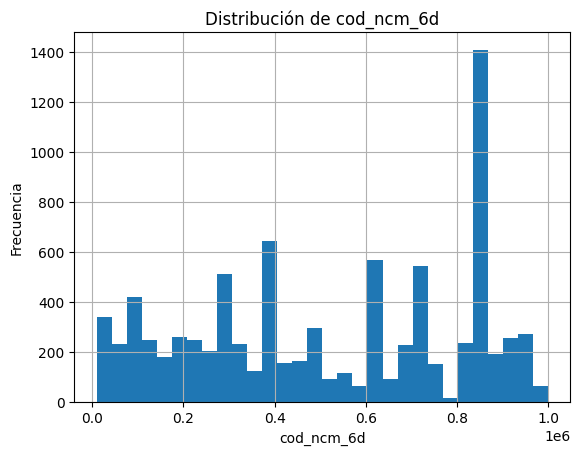

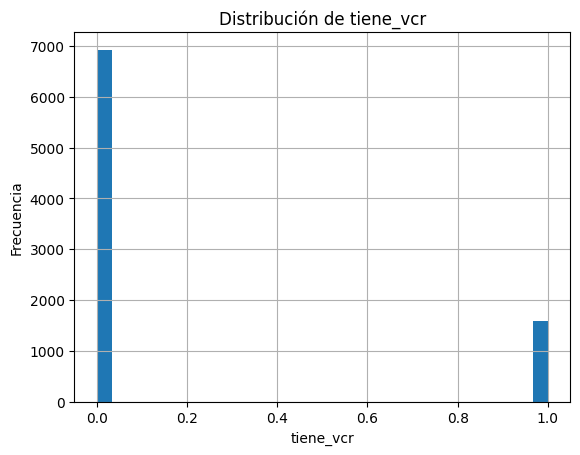

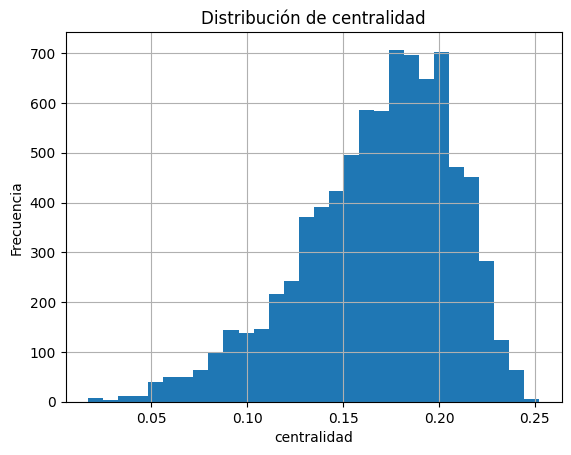

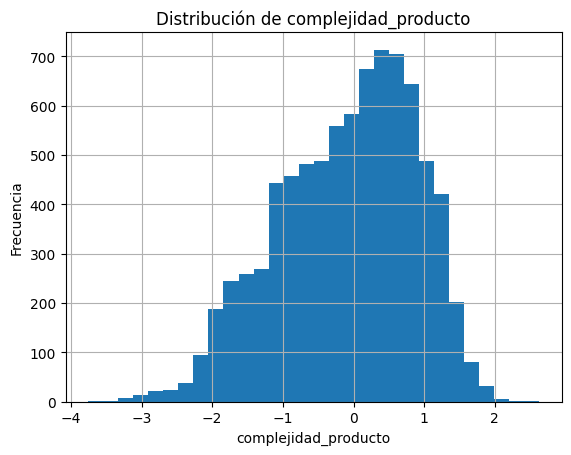

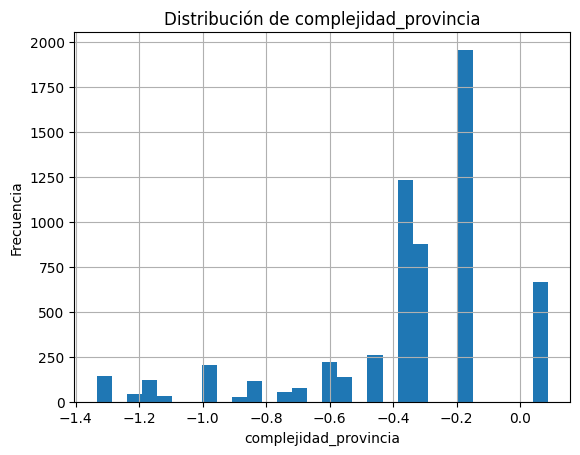

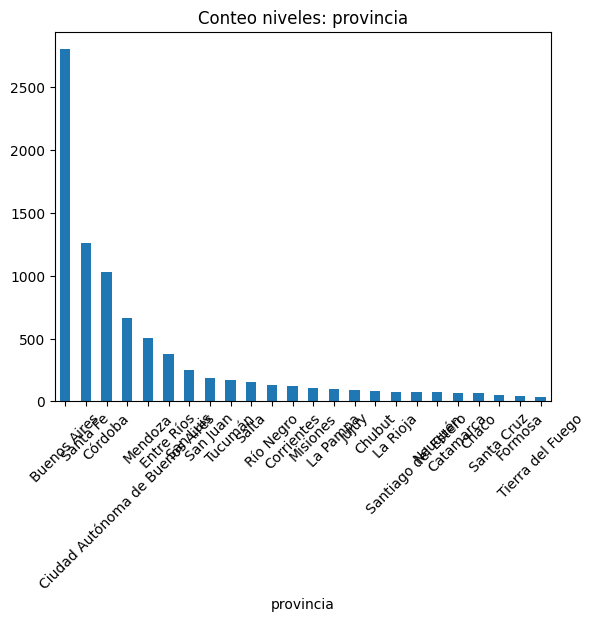

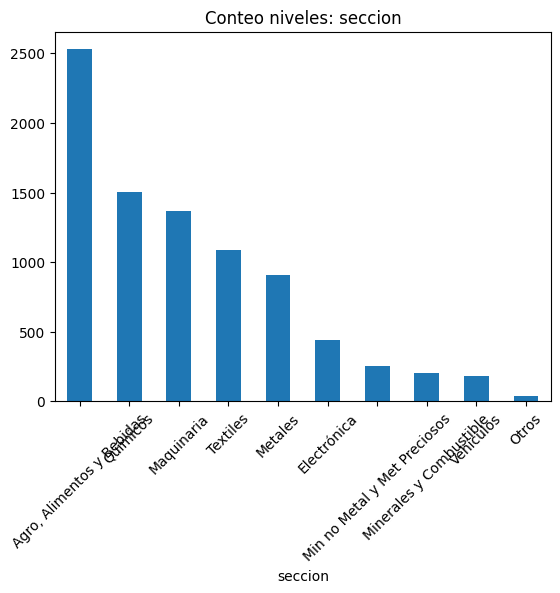

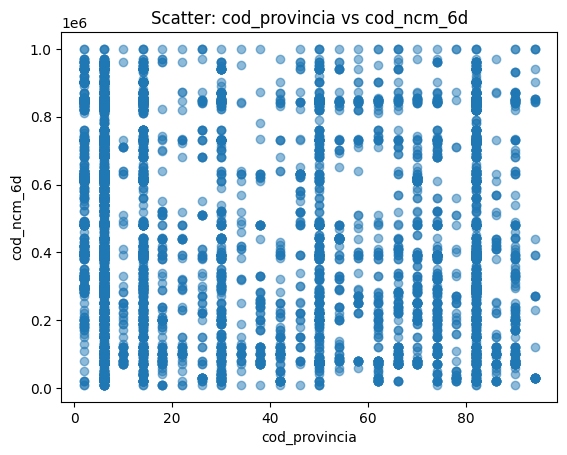

In [6]:
# Removed the definition of numeric_cols and cat_cols as they are now defined in the previous cell.
# numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print('Número de columnas numéricas:', len(numeric_cols))
print('Número de columnas categóricas:', len(cat_cols))

# Histogramas — hasta 6 primeras numéricas
for col in numeric_cols[:6]:
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Barras — primeras 6 categóricas con <=30 niveles
count = 0
for c in cat_cols:
    if df[c].nunique(dropna=True) <= 30:
        plt.figure()
        df[c].value_counts(dropna=False).head(30).plot(kind='bar')
        plt.title(f'Conteo niveles: {c}')
        plt.xticks(rotation=45)
        plt.show()
        count += 1
    if count >= 6:
        break

# Scatter: elegir dos numéricas con más de 0 varianza
if len(numeric_cols) >= 2:
    x = numeric_cols[0]
    y = numeric_cols[1]
    plt.figure()
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f'Scatter: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
else:
    print('No hay suficientes columnas numéricas para scatter.')

## 4) Transformaciones y creación de nuevas columnas útiles
Se crean columnas de trazabilidad y resumen por fila.

In [ ]:
# Variables numéricas resumen (suma/mean)
df_clean['numeric_sum'] = df_clean.select_dtypes(include=[np.number]).sum(axis=1)
df_clean['numeric_mean'] = df_clean.select_dtypes(include=[np.number]).mean(axis=1)

# Display the head of the dataframe to see all columns including the new ones
display(df_clean.head())

,cod_provincia,provincia,cod_ncm_6d,ncm_6d,seccion,tiene_vcr,centralidad,complejidad_producto,complejidad_provincia,numeric_sum,numeric_mean
0,2,Ciudad Autónoma de Buenos Aires,10129,"Caballos, exc. reproductores de raza pura","Agro, Alimentos y Bebidas",0,0.1663,0.0937,0.087869,10131.347869,2894.670820
1,2,Ciudad Autónoma de Buenos Aires,10619,Animales mamíferos ncop.,"Agro, Alimentos y Bebidas",0,0.1621,-0.0684,0.087869,10621.181569,3034.623305
2,2,Ciudad Autónoma de Buenos Aires,20621,Lenguas bovinas congeladas,"Agro, Alimentos y Bebidas",0,0.0943,-0.8430,0.087869,20622.339169,5892.096905
3,2,Ciudad Autónoma de Buenos Aires,20622,Hígados bovinos congelados,"Agro, Alimentos y Bebidas",0,0.1358,-0.5205,0.087869,20623.703169,5892.486620
4,2,Ciudad Autónoma de Buenos Aires,20629,"Despojos de bovinos, comestibles, congelados","Agro, Alimentos y Bebidas",0,0.1186,-1.1601,0.087869,20630.046369,5894.298963
